# ASSIGNMENT 4 
**Topic: Chapter 7, Chapter 8 & Chapter 9**
- Due: 21st January 2024
- Mode: Group Assignment (Not more than 3 students per group)
- Submission: E-Learning

GROUP NAME : UIA

1. IKMAL BIN KHAIRULEZUAN A21EC0186

2. ALIEYA ZAWANIE BINTI A ZAINI A21EC0156

3. UMAR HAZIQ BIN MUHAMAD NORHISHAM A21EC0235

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Question 1

(a)	Load `Sales Data.csv`, assign it into variable named `sales`. Display the first 10 rows of the `sales`.

In [5]:
sales=pd.read_csv('Sales Data.csv')
sales.head(10)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,20760,295500
7,8,3700,1400,5860,9960,2860,1400,25180,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


(b)	Get total profit of all months and show line plot with the following style properties:

        ●	Line Style dotted 
        ●	Line color should be red
        ●	Line width should be 3
        ●	Add a circle marker with size 8 and blue color
        ●	Show legend at the lower right location.
        ●	X label name = Month Number
        ●	Y label name = total profits
        ●	Title = Company Sales Per Month

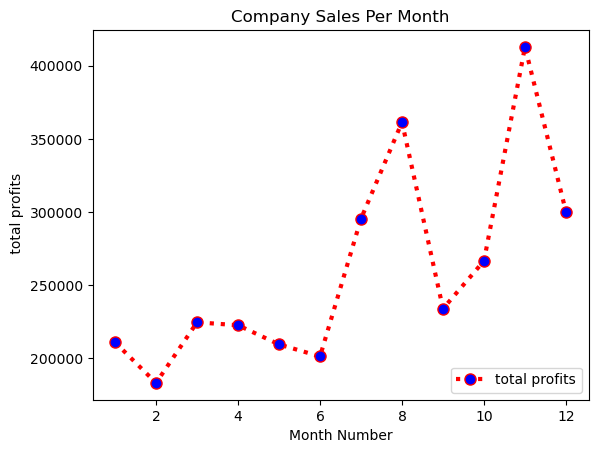

In [26]:
fig, axes = plt.subplots()

axes.plot(sales['month_number'],sales['total_profit'],color="red", lw=3, ls=':',marker='o',markersize=8,markerfacecolor='blue',label='total profits')

axes.set_title('Company Sales Per Month')
axes.set_xlabel('Month Number')
axes.set_ylabel(' total profits')
axes.legend(loc=4);

(c)	Read data from `Sales Data.csv` and show all product sales using a multiline plot, sized 1200 × 600 pixels. Differentiate all the lines by line color and marker.

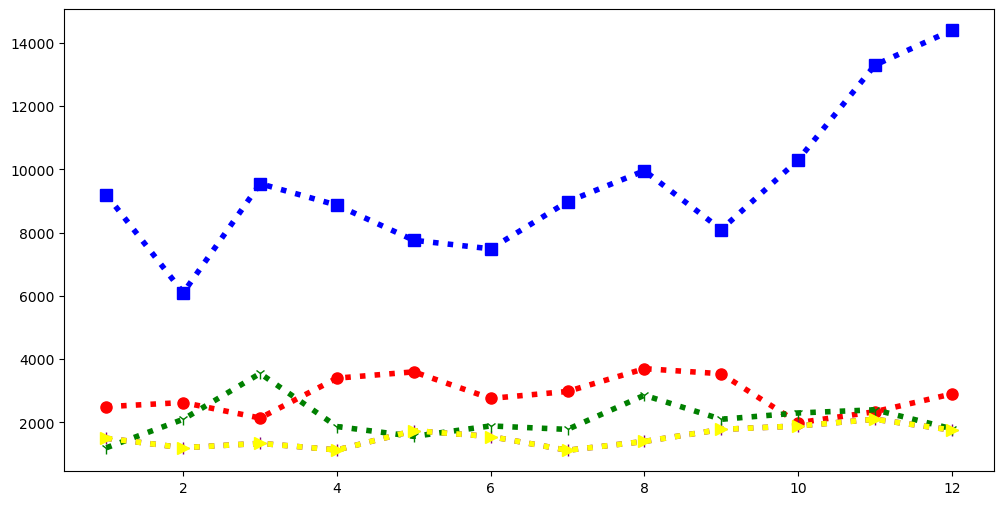

In [39]:
sales=pd.read_csv('Sales Data.csv')

fig, axes = plt.subplots(figsize=(12,6))

axes.plot(sales['month_number'],sales['facecream'], color='red', lw=4 , ls=':',marker='o',markersize=8)
axes.plot(sales['month_number'],sales['facewash'], color='purple', lw=4 , ls=':',marker='+',markersize=8)
axes.plot(sales['month_number'],sales['bathingsoap'], color='blue', lw=4 , ls=':',marker='s',markersize=8)
axes.plot(sales['month_number'],sales['shampoo'], color='green', lw=4 , ls=':',marker='1',markersize=8)
axes.plot(sales['month_number'],sales['moisturizer'], color='yellow', lw=4 , ls=':',marker='',markersize=8)

(d)	The products in the sales data can be further grouped as follow:

    a.Category A: facecream, facewash, moisturizer
    b.Category B: toothpaste
    c.Category C: bathingsoap, shampoo
    
    
Group the data accordingly and obtain the following information, then plot into two subplots: 

    1.total unit sold of each category for every month
    2.percentage of total unit sold of each category for every month over the grand total of unit sold of that category.


Text(0, 0.5, 'Percentage')

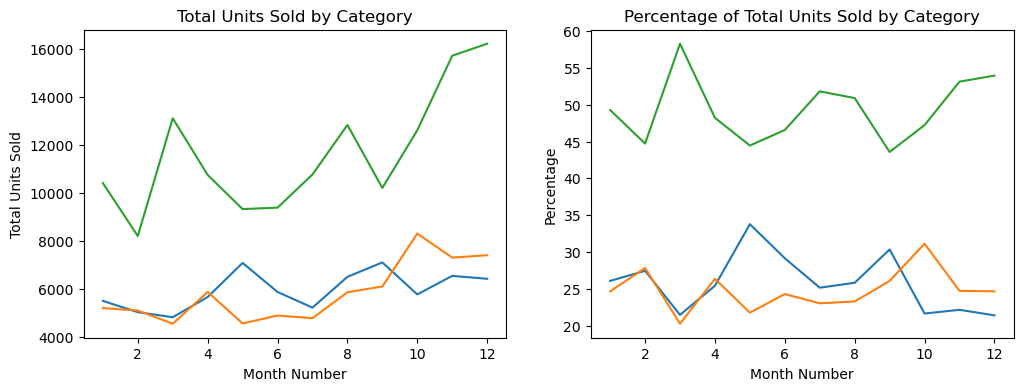

In [64]:
sales['Category_A']= sales[['facecream','facewash','moisturizer']].sum(axis=1)
sales['Category_B']= sales['toothpaste']
sales['Category_C']= sales[['bathingsoap','shampoo']].sum(axis=1)

sales['total_sold']=sales['Category_A'] + sales['Category_B'] + sales['Category_C']

fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].plot(sales['month_number'],sales[['Category_A', 'Category_B', 'Category_C']])
axes[0].set_title('Total Units Sold by Category')
axes[0].set_xlabel('Month Number')
axes[0].set_ylabel('Total Units Sold')



sales['Category_A%'] = (sales['Category_A']/sales['total_sold'])*100
sales['Category_B%'] = (sales['Category_B']/sales['total_sold'])*100
sales['Category_C%'] = (sales['Category_C']/sales['total_sold'])*100

axes[1].plot(sales['month_number'],sales[['Category_A%','Category_B%','Category_C%']])
axes[1].set_title('Percentage of Total Units Sold by Category')
axes[1].set_xlabel('Month Number')
axes[1].set_ylabel('Percentage')

### Question 2

(a) Read the three datasets given below and save the data into different DataFrame.

    a.customer.csv
    b.products.csv
    c.sales.csv


In [70]:
customer = pd.read_csv('customer.csv')
product = pd.read_csv('products.csv')
sale = pd.read_csv('sales.csv')
customer.head()

,c_id,Customer
0,1,Rabi
1,2,Raju
2,3,Alex
3,4,Rani
4,5,King


(b) From the above datasets, produce a chart (any appropriate chart) for each below:

    a.products sold by each store
    b.quantity sold against each product
    c.quantity and total sales against each product


In [71]:
product.head()

,p_id,product,price
0,1,Hard Disk,80
1,2,RAM,90
2,3,Monitor,75
3,4,CPU,55
4,5,Keyboard,20


In [72]:
sale.head()

,sale_id,c_id,p_id,product,qty,store
0,1,2,3,Monitor,2,ABC
1,2,2,4,CPU,1,DEF
2,3,1,3,Monitor,3,ABC
3,4,4,2,RAM,2,DEF
4,5,2,3,Monitor,3,ABC


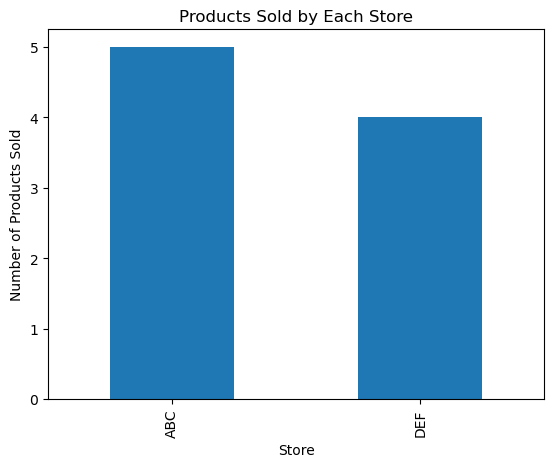

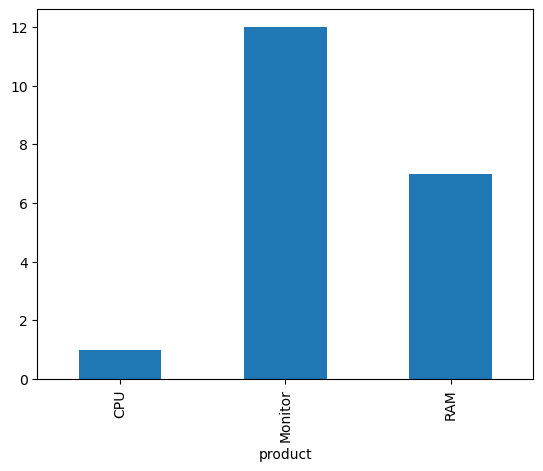

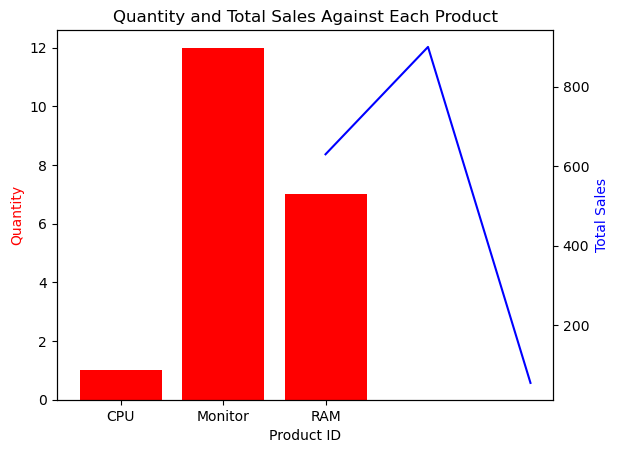

In [91]:
#a.
product_sold_each_store= sale.groupby('store')['product'].count()
product_sold_each_store.plot(kind='bar', xlabel='Store', ylabel='Number of Products Sold', title='Products Sold by Each Store')
plt.show()

#b
product_sold_each_store= sale.groupby('product')['qty'].sum()
product_sold_each_store.plot(kind='bar')

#c
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sale['total_sales']= sale['qty']* sale['p_id'].map(product.set_index('p_id')['price'])

total_sale_product=sale.groupby('p_id')['total_sales'].sum()
quantity_sold=sale.groupby('product')['qty'].sum()

ax1.bar(quantity_sold.index, quantity_sold, color='r', label='Quantity')
ax2.plot(total_sales_by_product.index, total_sales_by_product, color='b', label='Total Sales')

ax1.set_xlabel('Product ID')
ax1.set_ylabel('Quantity', color='r')
ax2.set_ylabel('Total Sales', color='b')
plt.title('Quantity and Total Sales Against Each Product')
plt.show()

(c) From the above datasets, produce an output for each below:

    a.quantity sold against each product against each store
    b.quantity sold against each store with total turnover of the store
    c.products which are not sold
    d.customers who have not purchased any product


In [171]:
#a
quantity_sold_by_each_store=sale.groupby(['store','product'])['qty'].sum()
print('quantity sold against each product against each store',quantity_sold_by_each_store)

print()
#b
quantity_sold_against_each_store=sale.groupby('store').agg({'qty':'sum'})
print('quantity sold against each store with total turnover of the store',quantity_sold_against_each_store)

print()
#c
not_sold=product[~product['p_id'].isin(sale['p_id'])]
print('products which are not sold',not_sold)

print()
#d
not_purchase=customer[~customer['c_id'].isin(sale['c_id'])]
print('customers who have not purchased any product:',not_purchase)

quantity sold against each product against each store store  product
ABC    Monitor    10
       RAM         3
DEF    CPU         1
       Monitor     2
       RAM         4
Name: qty, dtype: int64

quantity sold against each store with total turnover of the store        qty
store     
ABC     13
DEF      7

products which are not sold    p_id       product  price
0     1     Hard Disk     80
4     5      Keyboard     20
5     6         Mouse     10
6     7   Motherboard     50
7     8  Power supply     20

customers who have not purchased any product:    c_id Customer
4     5     King
5     7     Ronn
6     8      Jem
7     9      Tom


### Question 3

Given two dataset (`Death Male.xlsx` and `Death Female.xlsx`) that contains the data of recorded death in five states in Malaysia from 2011 to 2018.

**Task A**

(i)	Read the `Death Male.xlsx` and store it in a DataFrame named `death_male`. Group the data by `Year` and name the result as `dm_by_year` and plot a pie chart.


Text(0.5, 1.0, 'Number of death')

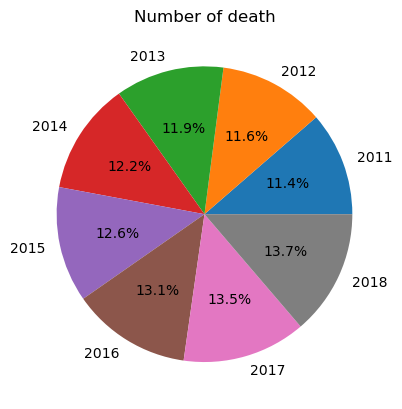

In [109]:
death_male=pd.read_excel('Death Male.xlsx')
death_male

dm_by_year=death_male.groupby('Year')['Number of death'].sum()

fig, ax = plt.subplots()

ax.pie(dm_by_year,labels=dm_by_year.index, autopct='%1.1f%%')
ax.set_title("Number of death")

(ii) Read the `Death Female.xlsx` and store it in a DataFrame named `death_female`. Group the data by `State` and name the result as `df_by_state` and plot an appropriate chart.

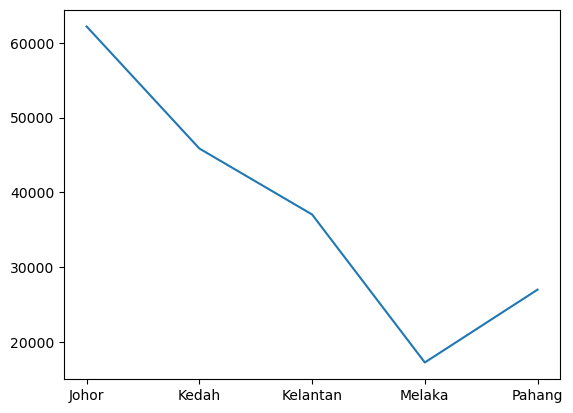

In [122]:
death_female=pd.read_excel('Death Female.xlsx')
death_female

df_by_state=death_female.groupby('State')['Number of death'].sum()

fig, ax = plt.subplots()
ax.plot(df_by_state)

**Task 2**

(i)	  Concatenate both `death_male` and `death_female` DataFrame and name the new DataFrame as `death`.	<br>
(ii)  Group the `death` by `State` and name the result as `by_state`.	<br>
(iii) Group the `death` by `Year` name the result as `by_year`.	<br>
(iv)  Create a chart as shown below with figure size of 12 inches × 6 inches and save it as Death in 2011-2018.png with dpi value 200.


<br>
<img src="Fig1.png", style="width: 750px";>

<BarContainer object of 8 artists>

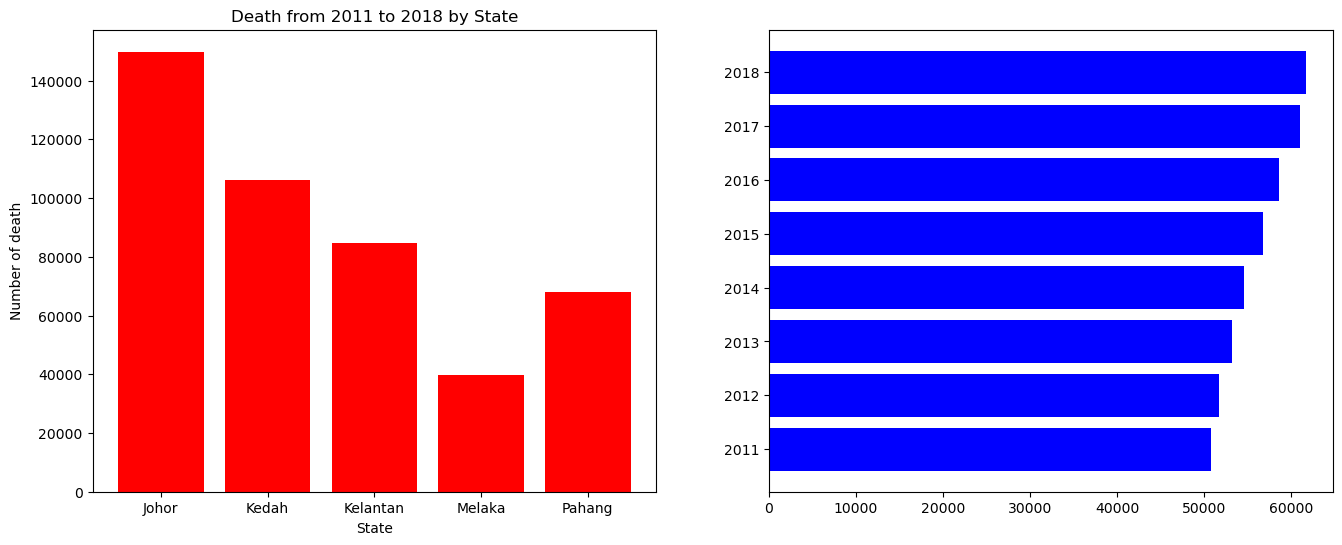

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].bar(by_state.index,by_state.values,color='red')
axes[0].set_title("Death from 2011 to 2018 by State")
axes[0].set_ylabel('Number of death')
axes[0].set_xlabel('State')

axes[1].barh(by_year.index,by_year.values,color='blue')

In [125]:
#1
death=pd.concat([death_male,death_female])
death

,Year,State,Gender,Number of death
0,2018,Johor,Male,12384
1,2018,Kedah,Male,8216
2,2018,Kelantan,Male,6332
3,2018,Melaka,Male,3079
4,2018,Pahang,Male,5525
...,...,...,...,...
35,2011,Johor,Female,6875
36,2011,Kedah,Female,5025
37,2011,Kelantan,Female,4400
38,2011,Melaka,Female,1964


In [128]:
by_state=death.groupby('State')['Number of death'].sum()
by_state

State
Johor       149836
Kedah       105999
Kelantan     84661
Melaka       39731
Pahang       67906
Name: Number of death, dtype: int64

In [130]:
by_year=death.groupby('Year')["Number of death"].sum()
by_year

Year
2011    50790
2012    51725
2013    53147
2014    54538
2015    56746
2016    58568
2017    60981
2018    61638
Name: Number of death, dtype: int64

**Task 3**

(i)	Create a pivot table with the name `death_pivot` as shown below.

<br>
<img src="Fig2a.png", style="width: 300px";>

In [133]:
death_pivot=death.pivot_table(['Number of death'],index=['Gender','Year'],columns='State')
death_pivot

Number of death                             
State                 Johor Kedah Kelantan Melaka Pahang
Gender Year                                             
Female 2011            6875  5025     4400   1964   3080
       2012            7212  5209     4301   1987   3078
       2013            7335  5420     4407   2078   3184
       2014            7387  5613     4630   2009   3209
       2015            7808  5941     4702   2181   3427
       2016            8250  6037     4698   2271   3531
       2017            8586  6283     4919   2431   3763
       2018            8733  6336     4984   2328   3721
Male   2011            9604  6844     5624   2642   4732
       2012            9989  7059     5589   2588   4713
       2013           10361  7096     5635   2669   4962
       2014           10517  7404     5958   2719   5092
       2015           11045  7733     6087   2778   5044
       2016           11674  7734     6111   2915   5347
       2017           12076  8049     6284   3092   5498
       2018           12384  8216     6332   3079   5525

(ii) Create a plot as shown below.

<br>
<img src="Fig3.png", style="width: 800px";>

Text(0, 0.5, 'Gender,Year')

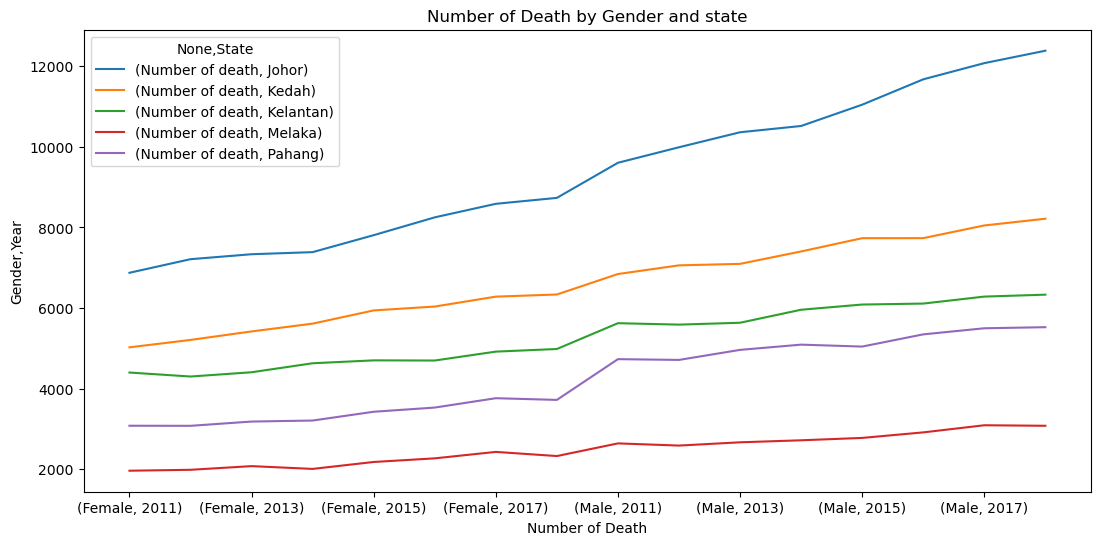

In [149]:
fig, axes = plt.subplots(figsize=(13,6))

death_pivot.plot(ax=axes,kind='line')
axes.set_title('Number of Death by Gender and state')
axes.set_xlabel("Number of Death")
axes.set_ylabel("Gender,Year")


### Question 4

(a)	The file named `Expenditure.xlsx` describes the expenditure (in dollars) on recreation per month by employees at a certain company, and their corresponding monthly incomes. 

    (i)	Using simple linear regression method, find the equation of the regression line. 
    (ii)	Find the slope and interception values for the regression line. 
    (iii)   Plot the data with the regression line.
    (iv)	Then estimate the monthly income of an employee at this company who spends 5000 dollars per month on recreation.  	


In [2]:
expenditure=pd.read_excel('Expenditure.xlsx')

X = expenditure['Expenditure'].values.reshape(-1, 1)
y = expenditure['Income']

#a
print("(i)The equation of the regression line")
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

slope = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)
equation_of_regline = f"y = {slope}x + {intercept}"
print(f"Equation of the regression line: {equation_of_regline}")

#b
print("\n(ii)Find the slope and interception values for the regression line.")
print(f"Model slope:{model.coef_[0]}")
print(f"Model intercept:{model.intercept_}")

#c
print("\n(iii)Plot the data with the regression line.")
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', linewidth=3, label='Regression Line')
plt.xlabel('Expenditure (in dollars)')
plt.ylabel('Monthly Income (in dollars)')
plt.title('Linear Regression')
plt.legend()
plt.show()

#d
expenditure_to_predict = np.array([[5000]])
estimated_income = model.predict(expenditure_to_predict)[0]
print(f"(iv) Estimated Monthly Income for $5000 Expenditure: {estimated_income:.2f}")

(i)The equation of the regression line


NameError: name 'LinearRegression' is not defined

(b) Clustering Task:

(i)	Load the `Titanic.csv` into a DataFrame named `Titanic`. Below is the data dictionary for the dataset.

<br>
<img src="Fig4.png", style="width: 500px";>

(ii) Perform dimensionality reduction to the dataset using the Principal Component Analysis (PCA) and next apply k-means clustering to the data.

In [ ]:
#i
titanic = pd.read_csv('Titanic.csv')
titanic

#ii
#pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(titanic.select_dtypes(include=['float64', 'int64']))
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=titanic['Survived'], cmap='viridis', s=50, alpha=0.7)
plt.title('PCA of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Survived')
plt.show()

#KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
titanic['cluster'] = kmeans.fit_predict(X_pca)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=titanic['cluster'], palette='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()